Number of classes: 10
Training data shape: (60000, 784)
Testing data shape: (10240, 784)


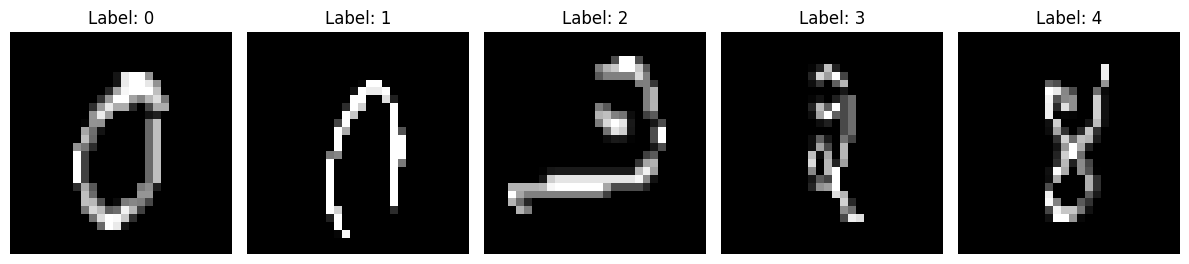

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load the dataset
train_data = pd.read_csv('Kannada-MNIST/train.csv')
dig_test_data = pd.read_csv('Kannada-MNIST/Dig-MNIST.csv')

# Extract features and labels for training
y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

# Extract features and labels for testing
y_test = dig_test_data['label']
X_test = dig_test_data.drop('label', axis=1)

# Display dataset info
print("Number of classes:", len(y_train.unique()))
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Show some image examples
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train.iloc[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [2]:
# Train a baseline MLP model
mlp = MLPClassifier()
print(mlp.get_params())

mlp.fit(X_train, y_train)

training_losses = mlp.loss_curve_
predictions_train = mlp.predict(X_train)
predictions_test = mlp.predict(X_test)
train_accuracy = accuracy_score(lb.inverse_transform(y_train), lb.inverse_transform(predictions_train))
test_accuracy = accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(predictions_test))

predictions = mlp.predict(X_test)
predictions_labels = lb.inverse_transform(predictions)
y_test_labels = lb.inverse_transform(y_test)

print("\nClassification Report:")
print(classification_report(y_test_labels, predictions_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, predictions_labels))

print("Accuracy:", test_accuracy)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.71      0.43      1024
           1       0.91      0.42      0.57      1024
           2       0.67      0.83      0.74      1024
           3       0.93      0.29      0.44      1024
           4       0.94      0.52      0.67      1024
           5       0.54      0.79      0.64      1024
           6       0.54      0.67      0.59      1024
           7       0.68      0.38      0.49      1024
     

In [3]:
# Experiment with different parameters
param_sets = [
    {'hidden_layer_sizes': (50,), 'max_iter': 200},
    {'hidden_layer_sizes': (500,), 'max_iter': 200},
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200},
    {'hidden_layer_sizes': (100, 100, 50), 'max_iter': 200},
]

best_model = None
best_accuracy = 0
train_accuracies = []
test_accuracies = []

for params in param_sets:
    print(f"\nTraining with parameters: {params}")
    model = MLPClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    preds = model.predict(X_test)
    preds_labels = lb.inverse_transform(preds)
    test_accuracy = accuracy_score(y_test_labels, preds_labels)
    test_accuracies.append(test_accuracy)
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    if test_accuracy > best_accuracy:
        best_model = model
        best_accuracy = test_accuracy

print("\nBest model parameters:", best_model.get_params())
print("Best accuracy:", best_accuracy)




Training with parameters: {'hidden_layer_sizes': (50,), 'max_iter': 200}
Train Accuracy: 1.0
Test Accuracy: 0.58720703125

Training with parameters: {'hidden_layer_sizes': (500,), 'max_iter': 200}
Train Accuracy: 1.0
Test Accuracy: 0.61484375

Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200}
Train Accuracy: 1.0
Test Accuracy: 0.6341796875

Training with parameters: {'hidden_layer_sizes': (100, 100, 50), 'max_iter': 200}
Train Accuracy: 1.0
Test Accuracy: 0.63193359375

Best model parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_st

In [4]:
param_sets = [
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.001},
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.01},
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1},
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1, 'batch_size': 20},
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1, 'batch_size': 100},
    {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1, 'batch_size': 200}
]

best_model = None
best_accuracy = 0
train_accuracies = []
test_accuracies = []

for params in param_sets:
    print(f"\nTraining with parameters: {params}")
    model = MLPClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    preds = model.predict(X_test)
    preds_labels = lb.inverse_transform(preds)
    test_accuracy = accuracy_score(y_test_labels, preds_labels)
    test_accuracies.append(test_accuracy)
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    if test_accuracy > best_accuracy:
        best_model = model
        best_accuracy = test_accuracy

print("\nBest model parameters:", best_model.get_params())
print("Best accuracy:", best_accuracy)




Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.001}
Train Accuracy: 0.9963333333333333
Test Accuracy: 0.62529296875

Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.01}
Train Accuracy: 0.9986833333333334
Test Accuracy: 0.62626953125

Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1}
Train Accuracy: 0.99805
Test Accuracy: 0.6349609375

Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1, 'batch_size': 20}
Train Accuracy: 0.9756
Test Accuracy: 0.61904296875

Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1, 'batch_size': 100}
Train Accuracy: 0.99555
Test Accuracy: 0.61767578125

Training with parameters: {'hidden_layer_sizes': (150, 100), 'max_iter': 200, 'alpha': 0.1, 'batch_size': 200}
Train Accuracy: 0.99805
Test Accuracy: 0.6349609375

Best model parameters: {'activation': 'relu',

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(150, 100), max_iter=200, alpha=0.1, batch_size=200)
print(mlp.get_params())

mlp.fit(X_train, y_train)

training_losses = mlp.loss_curve_
predictions_train = mlp.predict(X_train)
predictions_test = mlp.predict(X_test)
train_accuracy = accuracy_score(lb.inverse_transform(y_train), lb.inverse_transform(predictions_train))
test_accuracy = accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(predictions_test))

# Evaluate the model
predictions = mlp.predict(X_test)
predictions_labels = lb.inverse_transform(predictions)
y_test_labels = lb.inverse_transform(y_test)

print("\nBest Model Classification Report:")
print(classification_report(y_test_labels, predictions_labels))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test_labels, predictions_labels))

{'activation': 'relu', 'alpha': 0.1, 'batch_size': 200, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.74      0.51      1024
           1       0.89      0.53      0.66      1024
           2       0.69      0.84      0.76      1024
           3       0.82      0.27      0.40      1024
           4       0.88      0.61      0.72      1024
           5       0.56      0.83      0.67      1024
           6       0.53      0.58      0.56      1024
           7       0.70      0.52      0.60      1

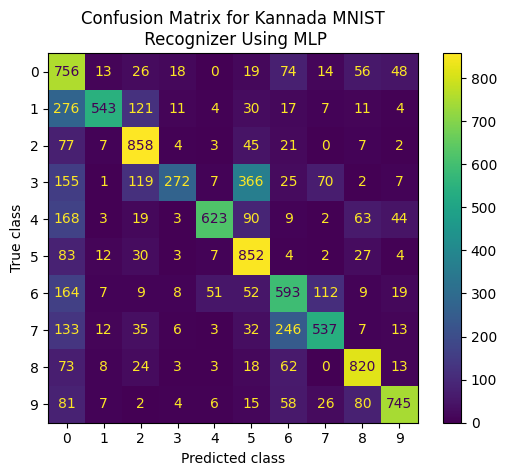

In [14]:
y = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_labels, predictions_labels), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Kannada MNIST\n Recognizer Using MLP')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()